<a href="https://colab.research.google.com/github/Sunny-Kaushik/Genre-Guru/blob/main/rs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install chardet
%pip install WordCloud
%pip install pandas
%pip install seaborn

In [6]:
import numpy as np
import pandas as pd
import chardet
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [7]:
with open("movies.dat", "rb") as file:
    movies = file.read()
with open("ratings.dat", "rb") as file:
    ratings = file.read()
with open("users.dat", "rb") as file:
    users = file.read()

In [8]:
detected_encoding = chardet.detect(movies)['encoding']
data_string = movies.decode(detected_encoding)
lines = data_string.splitlines()
movies = []
for line in lines:
    movie_id, movie, genre = line.split("::")
    genres = genre.split("|")
    movie_data = {"movie_id": movie_id, "movie": movie, "genre": genres}
    movies.append(movie_data)
movie = pd.DataFrame(movies)

In [27]:
distinct_mov = movie['movie_id'].value_counts(sort=False)
num_distinct_mov = distinct_mov.size
print(f"Number of distinct movies: {num_distinct_mov}")

Number of distinct movies: 3883


In [9]:
movie.head()

,movie_id,movie,genre
0,1,Toy Story (1995),"[Animation, Children's, Comedy]"
1,2,Jumanji (1995),"[Adventure, Children's, Fantasy]"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),"[Comedy, Drama]"
4,5,Father of the Bride Part II (1995),[Comedy]


In [10]:
detected_encoding = chardet.detect(ratings)['encoding']
data_string = ratings.decode(detected_encoding)
lines = data_string.splitlines()
ratings = []
for line in lines:
    user_id,movie_id,rating,timestamp = line.split("::")
    timestamps = timestamp.split("|")
    rating_data = {"user_id": user_id, "movie_id": movie_id, "rating": rating,"timestamp":timestamp}
    ratings.append(rating_data)
rating = pd.DataFrame(ratings)

In [11]:
distinct_users = rating['user_id'].value_counts(sort=False)
num_distinct_users = distinct_users.size
print(f"Number of distinct users: {num_distinct_users}")

Number of distinct users: 6040


In [12]:
rating.head()

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [13]:
detected_encoding = chardet.detect(users)['encoding']
data_string = users.decode(detected_encoding)
lines = data_string.splitlines()
users = []
for line in lines:
    user_id,gender,age,occupation,zip_code = line.split("::")
    zip_codes = zip_code.split("|")
    user_data = {"user_id": user_id, "gender": gender, "age": age,"occupation":occupation,"zip_code":zip_code}
    users.append(user_data)
user = pd.DataFrame(users)

In [14]:
user.head()

,user_id,gender,age,occupation,zip_code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


## Data Visualisation

### User data

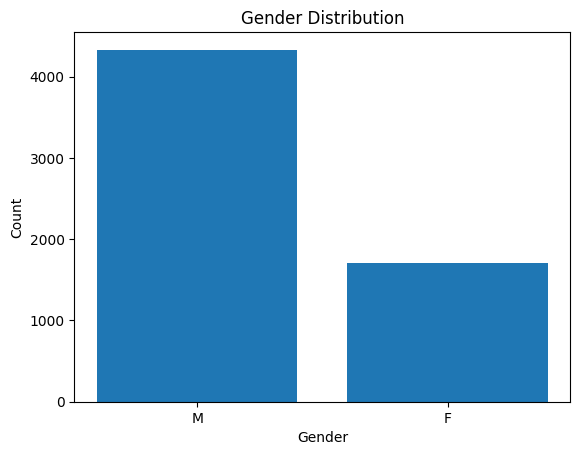

In [15]:
gender_counts = user['gender'].value_counts()
plt.bar(gender_counts.index, gender_counts.values)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()

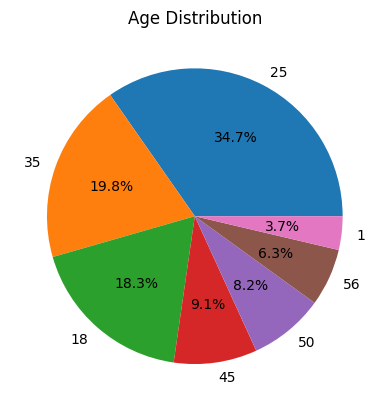

In [16]:
age_counts = user['age'].value_counts()
plt.pie(age_counts, labels=age_counts.index, autopct='%1.1f%%')
plt.title('Age Distribution')
plt.show()

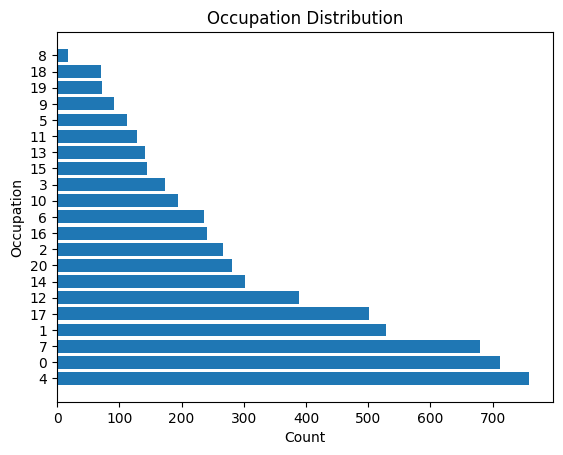

In [17]:
occupation_counts = user['occupation'].value_counts()
plt.barh(occupation_counts.index, occupation_counts.values)
plt.xlabel('Count')
plt.ylabel('Occupation')
plt.title('Occupation Distribution')
plt.show()

### Rating data

In [ ]:
# plt.hist(rating['rating'], bins=5, edgecolor='black')
# plt.xlabel('Rating')
# plt.ylabel('Count')
# plt.title('Rating Distribution')
# plt.show()

In [ ]:
# ratings_matrix = rating.pivot_table(index='user_id', columns='movie_id', values='rating', fill_value=0)
# sns.heatmap(ratings_matrix, cmap='viridis', cbar_kws={'label': 'Rating'})
# plt.xlabel('Movie ID')
# plt.ylabel('User ID')
# plt.title('Heatmap of Ratings')
# plt.show()

In [26]:
nan_counts = rating['rating'].isna().sum()
print(nan_counts)
# plt.bar(['Rating'], [nan_counts], color='red')
# plt.xlabel('Columns')
# plt.ylabel('Number of NaN Values')
# plt.title('Number of NaN Values in Rating Column')
# plt.show()

0


### movies data

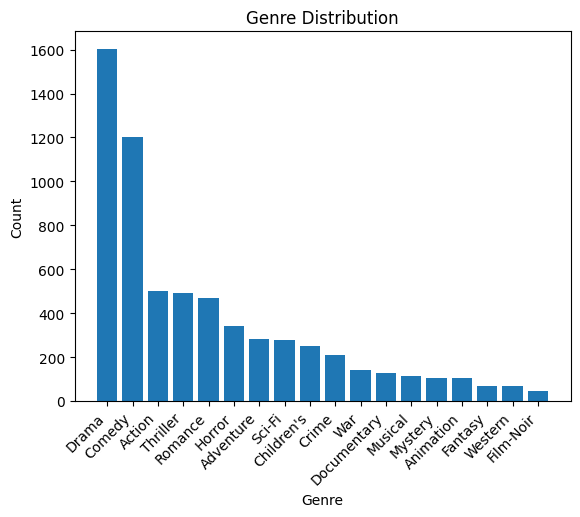

In [22]:
genres = [genre for sublist in movie['genre'] for genre in sublist]

# Creating a frequency distribution of genres
genre_counts = pd.Series(genres).value_counts()

plt.bar(genre_counts.index, genre_counts.values)
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Genre Distribution')
plt.xticks(rotation=45, ha='right')
plt.show()

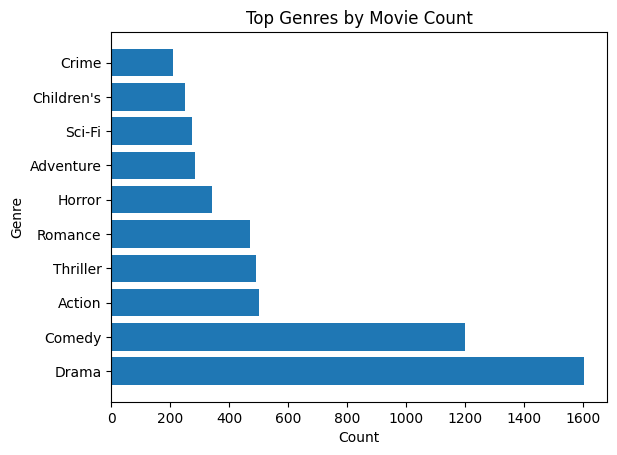

In [23]:
top_n_genres = genre_counts.head(10)  # Adjust N as needed
plt.barh(top_n_genres.index, top_n_genres.values)
plt.xlabel('Count')
plt.ylabel('Genre')
plt.title('Top Genres by Movie Count')
plt.show()

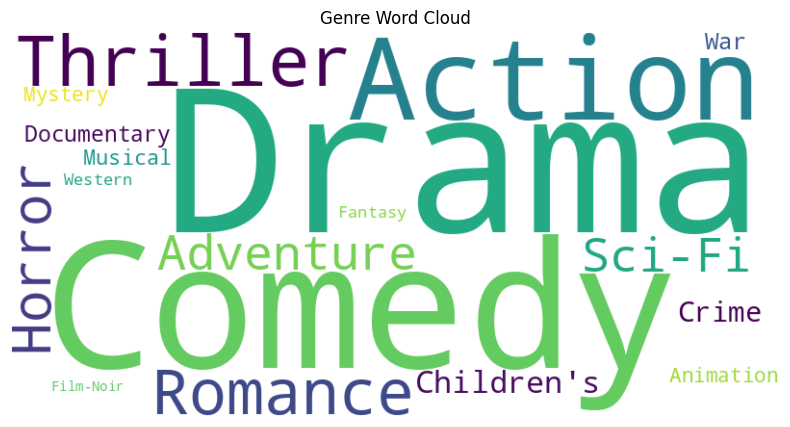

In [24]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(genre_counts)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Genre Word Cloud')
plt.show()

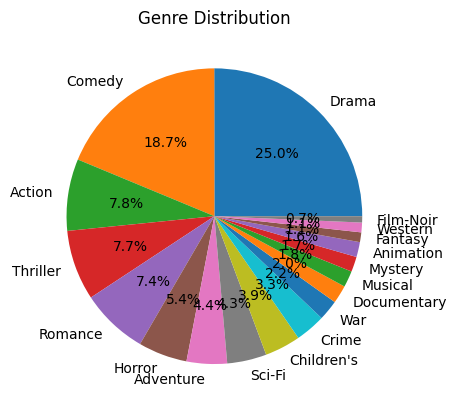

In [25]:
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%')
plt.title('Genre Distribution')
plt.show()

## Applying K-Means


In [29]:
import pandas as pd

# Assuming you have already processed movies and ratings data as described in your code snippets
# Convert lists to pandas DataFrames
movies_df = pd.DataFrame(movies)
ratings_df = pd.DataFrame(ratings)

# Merge movies and ratings dataframes
merged_data = pd.merge(ratings_df, movies_df, on='movie_id', how='outer')

# Pivot the merged dataframe to create the matrix
ratings_matrix = merged_data.pivot(index='user_id', columns='movie_id', values='rating')

# Print the resulting ratings matrix
print(ratings_matrix)


movie_id    1   10  100 1000 1001 1002 1003 1004 1005 1006  ...   99  990  \
user_id                                                     ...             
NaN       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
1           5  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
10          5  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
100       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
1000        5  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
...       ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
995       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
996         4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
997         4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
998       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
999       NaN  NaN  NaN  NaN  NaN  NaN    2    3  NaN  NaN  ...  NaN  NaN   

In [30]:
# Count total NaN values in the ratings matrix
total_nan_values = ratings_matrix.isna().sum().sum()

print("Total NaN values in the ratings matrix:", total_nan_values)


Total NaN values in the ratings matrix: 22456994


In [31]:
# Count total non-null values in the ratings matrix
total_non_null_values = ratings_matrix.notna().sum().sum()

print("Total non-null values in the ratings matrix:", total_non_null_values)


Total non-null values in the ratings matrix: 1000209


In [34]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming ratings_matrix is already created
# Remove NaN values from the ratings matrix
ratings_matrix_cleaned = ratings_matrix.dropna()

# # Standardize the ratings matrix
# scaler = StandardScaler()
# ratings_matrix_scaled = scaler.fit_transform(ratings_matrix_cleaned)

# Initialize KMeans with desired number of clusters
k = 5  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)

# Fit KMeans to the scaled ratings matrix
kmeans.fit(ratings_matrix_cleaned)

# Get cluster labels for each user
cluster_labels = kmeans.labels_

# Add cluster labels to the ratings matrix
ratings_matrix_cleaned['cluster'] = cluster_labels

# Visualize the clusters (assuming only two principal components for visualization)
plt.figure(figsize=(10, 6))
plt.scatter(ratings_matrix_cleaned[:, 0], ratings_matrix_cleaned[:, 1], c=cluster_labels, cmap='viridis')
plt.title('K-means Clustering of Users based on Movie Ratings Patterns')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

# Optional: Print the cluster centers
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers_df = pd.DataFrame(cluster_centers, columns=ratings_matrix_cleaned.columns[:-1])
print("Cluster Centers:")
print(cluster_centers_df)


ValueError: Found array with 0 sample(s) (shape=(0, 3883)) while a minimum of 1 is required by KMeans.